<a href="https://colab.research.google.com/github/MonishSoundarRaj/data_check_generator/blob/main/JSSPP_Plots_and_Metrics_gc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn
import pandas as pd
from datetime import datetime
from collections import Counter, defaultdict
import json
from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
bw_df = pd.read_csv("blue_waters_data_training.csv")
philly_df = pd.read_csv("philly_data_training.csv")
hl_df = pd.read_csv("helios_data_training.csv")
th_df = pd.read_csv("theta_data_training.csv")
# Syn_data_below
bw_syn_df = pd.read_csv("./synthetic_data_gc_bw.csv")
philly_syn_df = pd.read_csv("./synthetic_data_gc_philly.csv")
helios_syn_df = pd.read_csv("./synthetic_data_gc_helios.csv")
th_syn_df = pd.read_csv("./synthetic_data_gc_theta.csv")

In [3]:
# columns=["job", "user", "project", "state", "gpu_num", "cpu_num", "node_num",  "run_time", "wall_time", "new_status", "interval"]

In [4]:


print(bw_df.shape)
print(philly_df.shape)
print(hl_df.shape)
print(th_df.shape)
print(bw_syn_df.shape)
print(philly_syn_df.shape)
print(helios_syn_df.shape)
print(th_syn_df.shape)


(15000, 12)
(15000, 13)
(15000, 13)
(15000, 12)
(15000, 13)
(15000, 14)
(15000, 14)
(15000, 13)


In [5]:
bw_syn_df.head()

,Unnamed: 0,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0,0,10112,78,33,0,2304,2,2354.613526,1807,154185,179,Pass
1,1,1,1106,7,1,0,64,4,2.530479,91862,86771,1902729564,Killed
2,2,2,1920,1,12,0,10752,2,16.949284,100383,171682,25948421,Pass
3,3,3,9791,119,19,100,0,6,339.058558,21937,63778,168165256,Killed
4,4,4,4191,59,19,0,64,2,21.410397,64326,150179,30786316,Pass


In [6]:
philly_syn_df.head()

,Unnamed: 0,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0,0,8005,47,4,1,0,1,8.471576,2.366022,0,3.899698,1.374745,Failed
1,1,1,7333,48,1,1,0,1,484.411580,6.572851,0,11.572695,676.798771,Pass
2,2,2,9902,109,1,1,0,1,74.666908,2.000091,0,2.000155,1.000000,Pass
3,3,3,807,16,1,1,0,1,10.196163,57602.707739,0,56433.582725,13630.358403,Killed
4,4,4,6667,47,1,1,0,1,10.880176,19200.090889,0,34499.606636,130207.686679,Failed


In [7]:
helios_syn_df.head()

,Unnamed: 0,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0,0,10048,5,1,1,1,1,11.077702,2.061753,0,1.178923,24.084944,Pass
1,1,1,12298,12,4,0,1,1,46.894119,2.122000,0,1.000754,34.018585,Pass
2,2,2,12698,21,1,0,1,1,55.346670,2.000000,0,1.000000,0.000231,Pass
3,3,3,3026,10,4,8,5,1,323.937476,2987.134045,0,2986.874352,198563.285822,Pass
4,4,4,8969,10,6,8,8,1,44.075183,11002.008707,0,321.771680,196294.474026,Pass


In [8]:
th_syn_df.head()

,Unnamed: 0,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0,0,3316,1,1,0,8192.0,128.0,1127.038716,2870.506839,8978.253506,186.037040,Pass
1,1,1,10633,26,33,0,128.0,2.0,214.264780,49.848440,633.785162,0.004682,Pass
2,2,2,5046,15,10,0,8192.0,128.0,713.090220,16.980046,412.129587,0.004681,Pass
3,3,3,9602,8,19,0,8192.0,8.0,42.283021,8829.492334,22381.177508,3147.194659,Pass
4,4,4,8328,8,12,0,8192.0,128.0,220.918353,411.853311,3767.775956,1.712024,Pass


In [9]:
def plot_cdf(x, bins, xlabel, ylabel="Frequency (%)", color="", linestyle="--"):
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        x = np.sort(x)
        cdf = 100 * np.arange(len(x)) / float(len(x))
        if color:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5, color=color)
        else:
            plt.plot(x, cdf, linestyle=linestyle, linewidth=5)
        plt.xlabel(xlabel, fontsize=14)
        plt.ylabel(ylabel, fontsize=14)
        plt.margins(0)
        plt.ylim(0, 100)
        plt.xlim(10**0, 10**8)
        plt.grid(True)
        plt.style.use("default")

# Core Plots

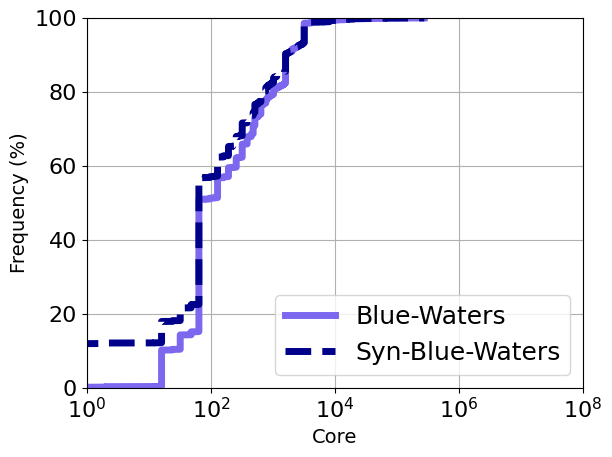

In [10]:
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_df.iterrows()], 100000, "Core", color = "#7B68EE", linestyle="-")
plot_cdf([row["cpu_num"] if row["cpu_num"] != 0 else row["gpu_num"]*16 for _, row in bw_syn_df.iterrows()], 100000, "Core", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

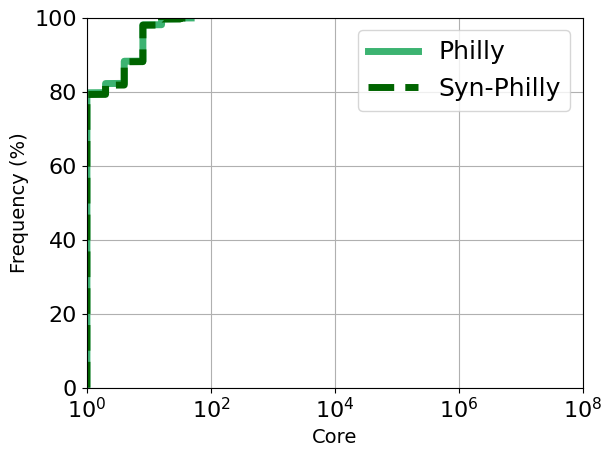

In [11]:
plot_cdf(philly_df["gpu_num"], 100000, "Core", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["gpu_num"], 100000, "Core", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

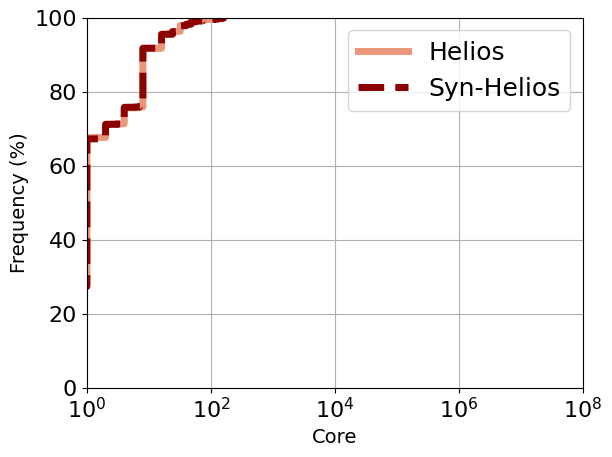

In [12]:
plot_cdf(hl_df["gpu_num"], 100000, "Core", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["gpu_num"], 100000, "Core", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

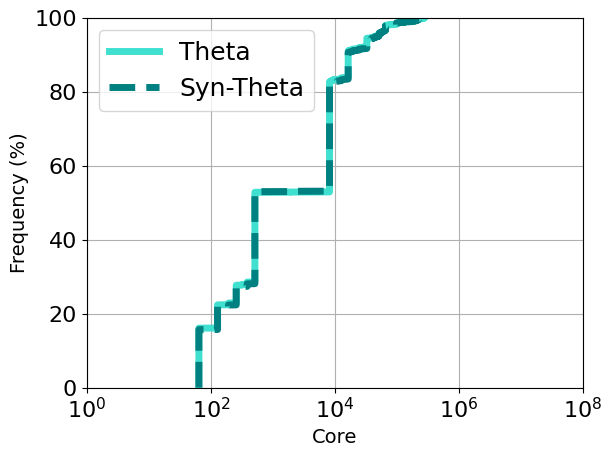

In [13]:
plot_cdf(th_df["cpu_num"], 100000, "Core", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["cpu_num"], 100000, "Core", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

#Run Time Plots

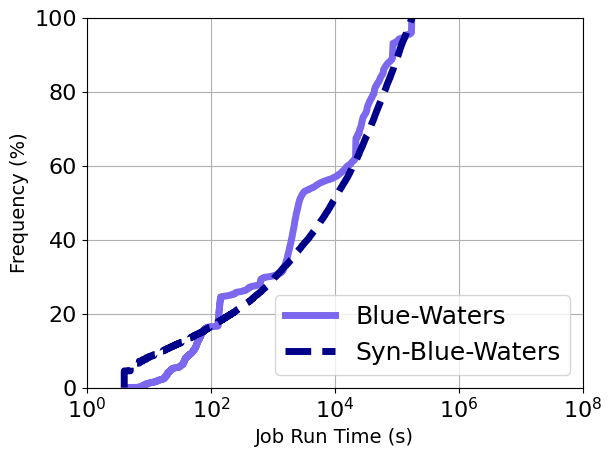

In [14]:
plt.style.use("default")
plot_cdf(bw_df["run_time"], 1000,"Job Run Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

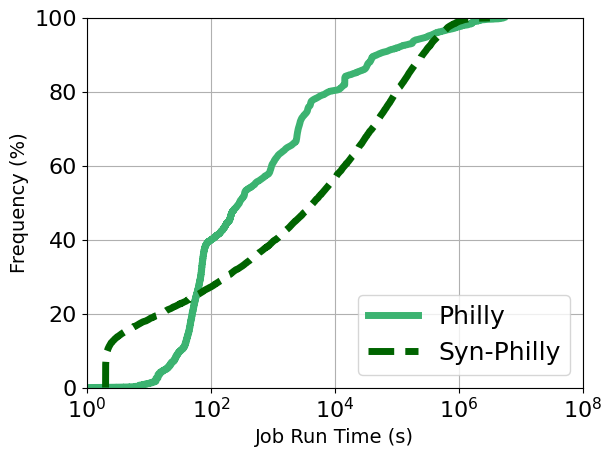

In [15]:
plt.style.use("default")
plot_cdf(philly_df["run_time"], 1000,"Job Run Time (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["run_time"], 1000,"Job Run Time (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

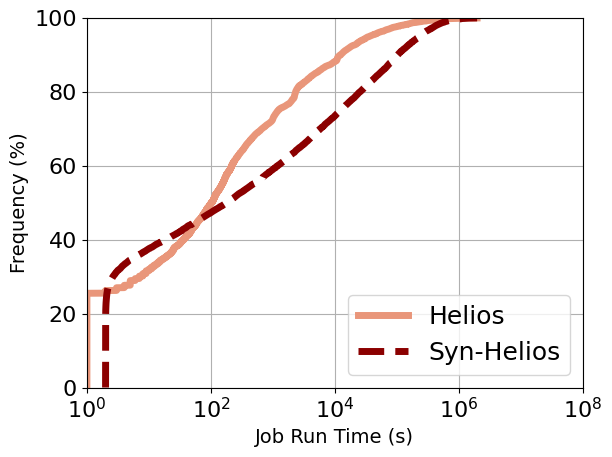

In [16]:
plt.style.use("default")
plot_cdf(hl_df["run_time"], 10009999,"Job Run Time (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["run_time"], 10009999,"Job Run Time (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

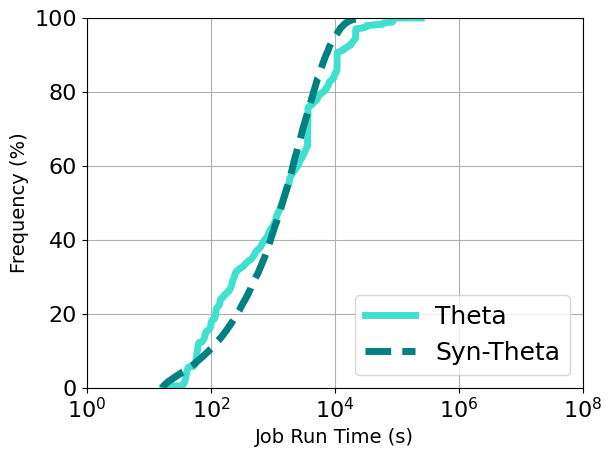

In [17]:
plt.style.use("default")
plot_cdf(th_df["run_time"], 1000, "Job Run Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["run_time"], 1000, "Job Run Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Interval Plots


In [18]:
def get_interval(a, peak=False):
    def get_time_of_day2(time):
        time = datetime.fromtimestamp(time)
        return (time.hour + (time.minute>30))%24
    if peak:
        z = a.apply(get_time_of_day2)
        b = a-a.shift(1)
        c = b[(z>=8) & (z<=17)]
        return c
    return a-a.shift(1)

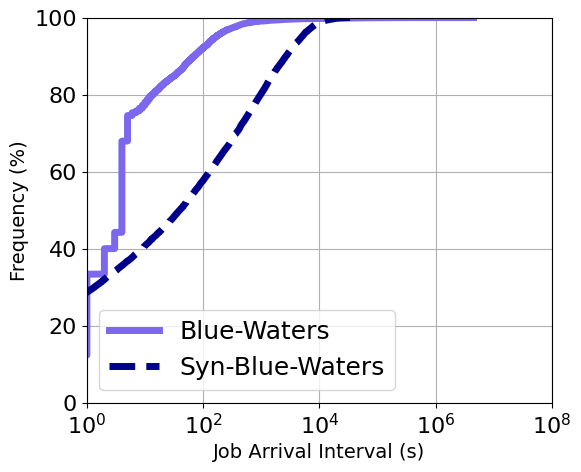

In [19]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(bw_df["interval"], 10000,"Job Arrival Interval (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["interval"], 10000,"Job Arrival Interval (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

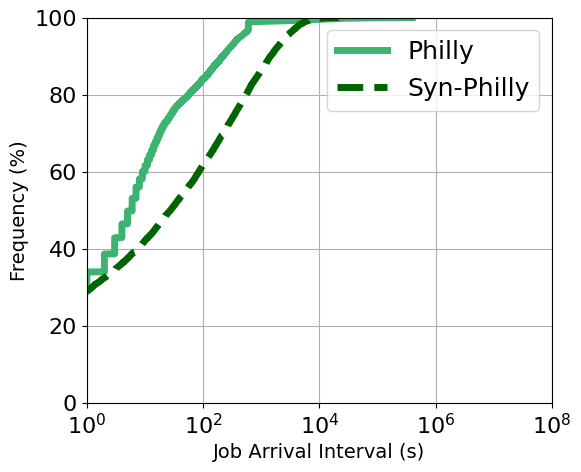

In [20]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(philly_df["interval"], 1000,"Job Arrival Interval (s)", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["interval"], 1000,"Job Arrival Interval (s)", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

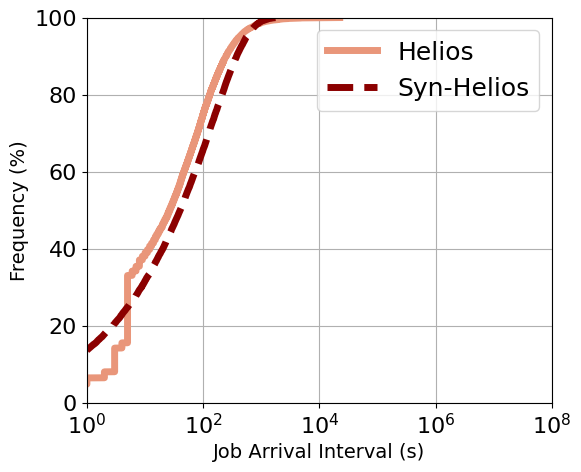

In [21]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(hl_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["interval"], 10009999,"Job Arrival Interval (s)", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")


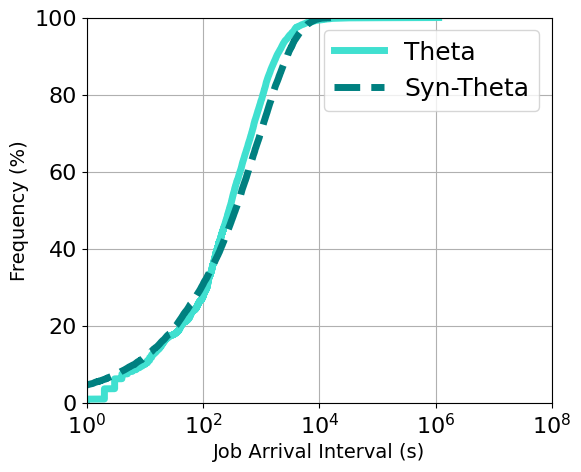

In [22]:
plt.style.use("default")
plt.figure(figsize=[6.,5])
plot_cdf(th_df["interval"], 100099,"Job Arrival Interval (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["interval"], 100099,"Job Arrival Interval (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# User CDF Plots

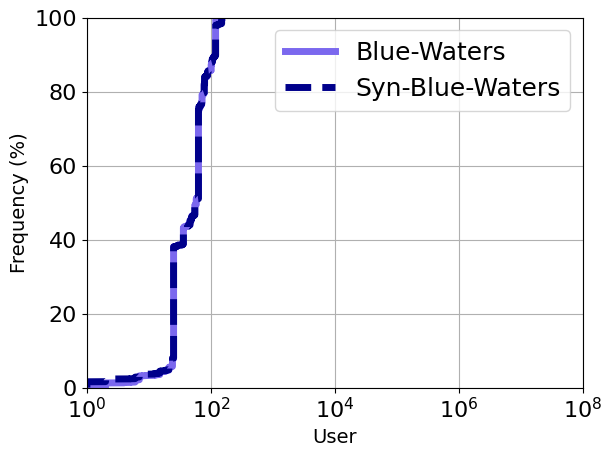

In [23]:
plt.style.use("default")
plot_cdf(bw_df["user"], 1000,"User", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["user"], 1000,"User", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

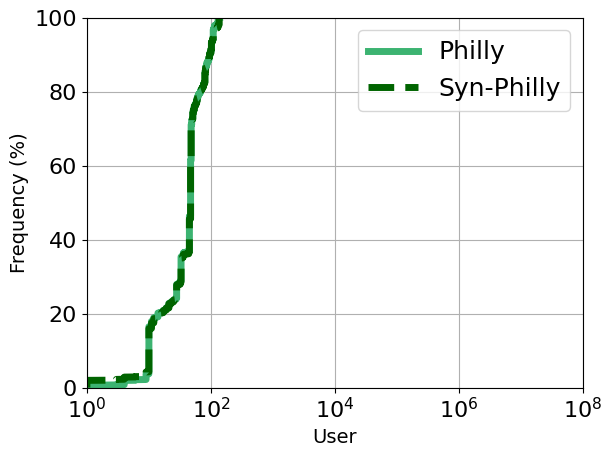

In [24]:
plt.style.use("default")
plot_cdf(philly_df["user"], 1000,"User", color = "#3CB371", linestyle="-")
plot_cdf(philly_syn_df["user"], 1000,"User", color = "#006400", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Philly", "Syn-Philly"])
plt.xscale("log")

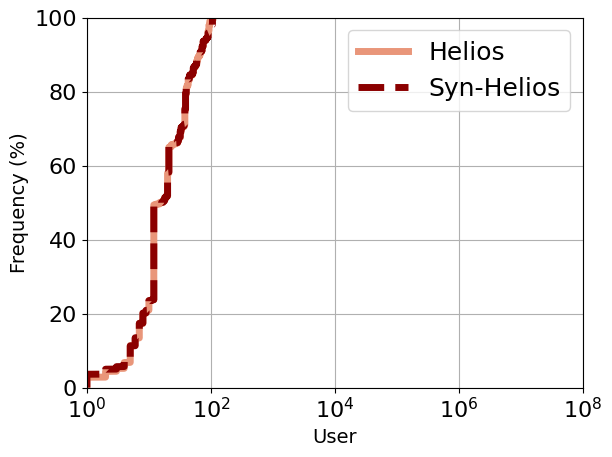

In [25]:
plt.style.use("default")
plot_cdf(hl_df["user"], 10009999,"User", color = "#E9967A", linestyle="-")
plot_cdf(helios_syn_df["user"], 10009999,"User", color = "#8B0000", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Helios", "Syn-Helios"])
plt.xscale("log")

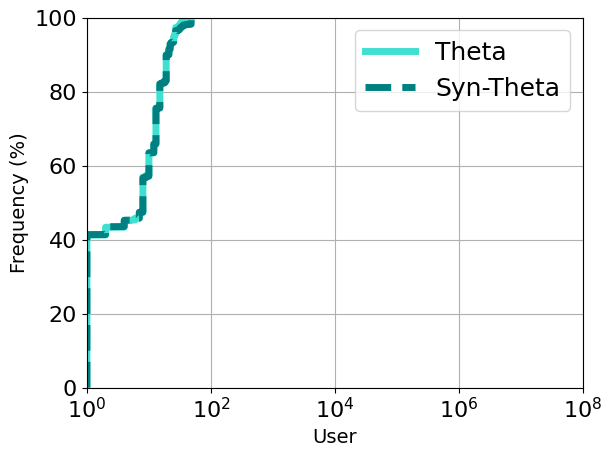

In [26]:
plt.style.use("default")
plot_cdf(th_df["user"], 1000, "User", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["user"], 1000, "User", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Wall Time Plots

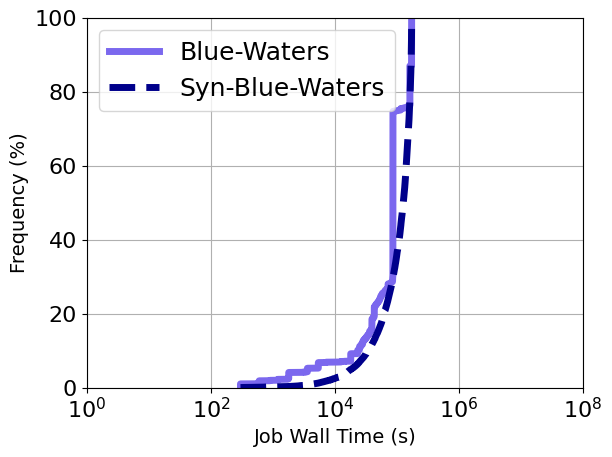

In [27]:
plt.style.use("default")
plot_cdf(bw_df["wall_time"], 1000,"Job Wall Time (s)", color = "#7B68EE", linestyle="-")
plot_cdf(bw_syn_df["wall_time"], 1000,"Job Wall Time (s)", color = "#00008B", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Blue-Waters", "Syn-Blue-Waters"])
plt.xscale("log")

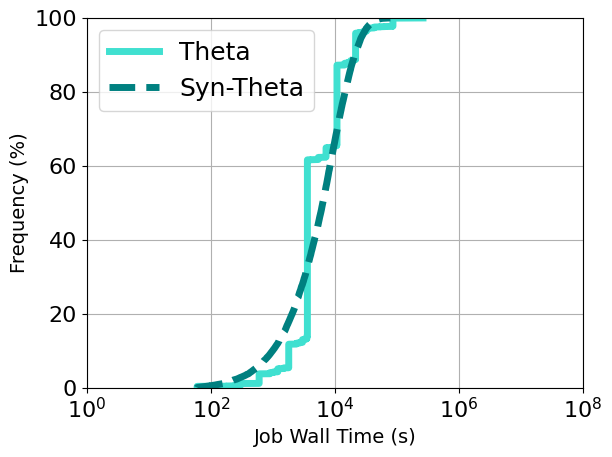

In [28]:
plt.style.use("default")
plot_cdf(th_df["wall_time"], 1000, "Job Wall Time (s)", color = "#40E0D0", linestyle="-")
plot_cdf(th_syn_df["wall_time"], 1000, "Job Wall Time (s)", color = "#008080", linestyle="--")
plt.rc('legend',fontsize=18)
plt.legend(["Theta", "Syn-Theta"])
plt.xscale("log")

# Calc Metrics

In [29]:
import argparse
import pandas as pd
import scipy as sc
import numpy as np
from scipy.stats import entropy
from scipy.stats import wasserstein_distance
import os


'''
This function return a float value. It takes two data files and the interested feature as inputs.
It calculates the distance between these two datasets and outputs a quantitive value.
'''

#A simple function to create a Probability Mass Function out of a dataframe
#Takes in one dataframe as input, and outputs an array containing the probability of each unique event in each field of the dataframe
def createPMF(data):
    length = data.shape[1]
    data = data.values.tolist()
    pmf = []

    #Loop through each of the 13 categories in each job trace
    for i in range(length):
        #Find the number of unique occurences within each category
        #print(i)
        temp = []
        occurence = []
        for col in data:
          #print(col)
          if col[i] not in temp:
            temp.append(col[i])
            occurence.append(1)
            #print(col[i])
          else:
            k = temp.index(col[i])
            occurence[k] += 1

        #Divide each occurence by the total number of datapoints (counting repeats), to get the relative frequency of each element
        total = sum(occurence)
        for i in range(len(occurence)):
          occurence[i] = occurence[i] / total

        #Now add the values and their probabilities to the pmf list
        pmf.append([temp, occurence])

    return pmf

#Function to process the strings in the new_status column (needed for the corr funcs)
def preprocess(data):
    ind = 0
    for i in range(len(data['new_status'])):
        if data.loc[i, 'new_status'] == 'Pass': data.loc[i, 'new_status'] = 1
        if data.loc[i, 'new_status'] == 'Failed': data.loc[i, 'new_status'] = 0
        if data.loc[i, 'new_status'] == 'Killed': data.loc[i, 'new_status'] = -1
        ind += 1

#Function to find and return the Kulback-Leibler divergence of two csv files created using the PMF function above
#Takes in two files, outputting the KL divergences of every feature inside a dataframe
def calc_kl(file1, file2):
    #Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    kl_divs = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)
        #Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        index = df1.columns.get_loc(feature)

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(1e-20) #Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        # Calculate KL divergence
        kl_divs.loc[0, feature] = entropy(p, q)
    print("")
    print("------------Kulback-Leibler Divergence------------")
    print(kl_divs)


#Function to calculate the difference in correlation between a feature shared by two datasets
#Takes in two files as input, outputting a dataframe containing the % difference in the correlation coefficients of the feature in either file
#Results can be interpreted as 'the correlation coefficient of file1's feature is *calc_corr* % larger/smaller than file2's feature
def calc_corr(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)

    corr1 = df1.corr(numeric_only=False)
    corr2 = df2.corr(numeric_only=False)

    #Divide the two correlations to obtain the % difference, storing each entry in a new dataframe
    corr_df = pd.DataFrame(corr1 / corr2)
    print("")
    print("------------Correlation------------")
    print(corr_df)

#Function to calculate how correlated an interested feature is in two different datasets
#Takes in two files, outputting a dataframe containing the correlation coefficients that describes how correlated the features are between either dataset
def calc_corr_with(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)

    preprocess(df1)
    preprocess(df2)
    print("")
    print("------------Correlation Coefficients------------")
    print(df1.corrwith(df2,numeric_only=True))

#Function to calculate the hellinger distance between a feature shared by two different datasets
#Takes in two files, outputting a dataframe containing the distance metrics for each feature.
def calc_hellinger(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    hellinger = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        # Ensure that both dists are of equal length
        if len(p) > len(q):
            n = len(p) - len(q)
            for i in range(n):
                q.append(
                    1e-20)  # Append an incredibly small number to make up for the difference in dataset length. Note that doing this rather than just shortening the sample dataset to 10000 points has little to no difference
        else:
            n = len(q) - len(p)
            for i in range(n):
                p.append(1e-20)

        sum = 0
        for i in range(len(p)):
            sum += (np.sqrt(p[i]) - np.sqrt(q[i])) ** 2

        #print((1 / np.sqrt(2)) * np.sqrt(sum))
        hellinger.loc[0, feature] = (1 / np.sqrt(2)) * np.sqrt(sum)

    print("")
    print("------------Hellinger------------")
    print(hellinger)
    return hellinger

#Function to calculate the wasserstein distance between a feature shared by two different datasets
#Takes in two filesas input, outputting a datatframe containing distance metrics that informs us of how dissimilar all the features are
def calc_wasserstein(file1, file2):
    # Create dataframes out of the two given files
    df1 = pd.read_csv(file1)
    df2 = pd.read_csv(file2)
    wassersteins = pd.DataFrame(columns=df1.columns)
    for feature in df1.columns:
        # Get the index of the interested feature
        index = df1.columns.get_loc(feature)

        # Create PMFs from the two DFs (using only the interested feature)
        p = createPMF(df1)[index][1]
        q = createPMF(df2)[index][1]

        #print(wasserstein_distance(p, q))
        wassersteins.loc[0, feature] = wasserstein_distance(p, q)
    print("")
    print("------------Wassersteins------------")
    print(wassersteins)
    return wassersteins


# Blue Waters Calc

In [30]:
calc_kl("blue_waters_data_training.csv", "synthetic_data_gc_bw.csv")
calc_corr("blue_waters_data_training.csv", "synthetic_data_gc_bw.csv")
calc_corr_with("blue_waters_data_training.csv", "synthetic_data_gc_bw.csv")
calc_hellinger("blue_waters_data_training.csv", "synthetic_data_gc_bw.csv")
calc_wasserstein("blue_waters_data_training.csv", "synthetic_data_gc_bw.csv")


------------Kulback-Leibler Divergence------------
  u_id       job      user   project   gpu_num    cpu_num node_num  interval  \
0  0.0  0.003512  6.376483  2.818137  5.450958  15.090613  2.68121  9.270222   

   run_time wall_time node_hour new_status  
0  1.392347  6.386274  0.473447   8.181362  

------------Correlation------------
            Unnamed: 0      cpu_num     gpu_num  interval         job  \
Unnamed: 0         NaN          NaN         NaN       NaN         NaN   
cpu_num            NaN     1.000000    1.945008  6.138194    7.357040   
gpu_num            NaN     1.945008    1.000000  1.912232    2.476988   
interval           NaN     6.138194    1.912232  1.000000   -1.050791   
job                NaN     7.357040    2.476988 -1.050791    1.000000   
new_status         NaN    -6.143184    5.088832 -0.894345    2.008662   
node_hour          NaN  -713.406625    0.025071 -1.975124    0.293205   
node_num           NaN -1400.944757  -10.119756 -2.302925    3.425104   
pro

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.0,0.0,0.006606,0.006478,0.025845,0.035863,0.00254,0.00927,0.000063,0.000516,0.00002,0.333256


# Philly Calc

In [31]:
calc_kl("philly_data_training.csv", "synthetic_data_gc_philly.csv")
calc_corr("philly_data_training.csv", "synthetic_data_gc_philly.csv")
calc_corr_with("philly_data_training.csv", "synthetic_data_gc_philly.csv")
calc_hellinger("philly_data_training.csv", "synthetic_data_gc_philly.csv")
calc_wasserstein("philly_data_training.csv", "synthetic_data_gc_philly.csv")


------------Kulback-Leibler Divergence------------
  u_id       job      user   project   gpu_num cpu_num  node_num   interval  \
0  0.0  0.477176  5.537643  2.238725  1.094513  0.2321  1.198298  28.916173   

   run_time wall_time  node_hour core_hour new_status  
0  2.268485  9.615805  38.681869  2.111049   8.668298  

------------Correlation------------
            Unnamed: 0  core_hour  cpu_num    gpu_num    interval         job  \
Unnamed: 0         NaN        NaN      NaN        NaN         NaN         NaN   
core_hour          NaN   1.000000      NaN   1.639239  -14.002775    1.119686   
cpu_num            NaN        NaN      NaN        NaN         NaN         NaN   
gpu_num            NaN   1.639239      NaN   1.000000   -0.498676   16.850736   
interval           NaN -14.002775      NaN  -0.498676    1.000000    1.302948   
job                NaN   1.119686      NaN  16.850736    1.302948    1.000000   
new_status         NaN   0.851720      NaN   3.117031   -0.270498   -0.08

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.0,0.000023,0.007231,0.0757,0.061483,0.857143,0.857143,0.165293,0.000117,0.999933,0.999817,0.000106,0.333267


# Helios Calc

In [32]:
calc_kl("helios_data_training.csv", "synthetic_data_gc_helios.csv")
calc_corr("helios_data_training.csv", "synthetic_data_gc_helios.csv")
calc_corr_with("helios_data_training.csv", "synthetic_data_gc_helios.csv")
calc_hellinger("helios_data_training.csv", "synthetic_data_gc_helios.csv")
calc_wasserstein("helios_data_training.csv", "synthetic_data_gc_helios.csv")


------------Kulback-Leibler Divergence------------
  u_id  job     user   project   gpu_num  cpu_num  node_num   interval  \
0  0.0  0.0  5.91399  1.499981  0.448928  0.67205  0.159245  35.748925   

   run_time wall_time  node_hour core_hour new_status  
0  3.566583  9.615805  39.838065  3.485079   8.698406  

------------Correlation------------
            Unnamed: 0  core_hour    cpu_num    gpu_num  interval         job  \
Unnamed: 0         NaN        NaN        NaN        NaN       NaN         NaN   
core_hour          NaN   1.000000   2.110943  -3.894091  0.183281   -0.049842   
cpu_num            NaN   2.110943   1.000000   9.078056 -0.005530   -0.907967   
gpu_num            NaN  -3.894091   9.078056   1.000000  0.791035    0.412677   
interval           NaN   0.183281  -0.005530   0.791035  1.000000   -0.490647   
job                NaN  -0.049842  -0.907967   0.412677 -0.490647    1.000000   
new_status         NaN   0.086587   3.739736  14.865707  0.330248    0.956062   
no

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,core_hour,new_status
0,0.0,0.0,0.009328,0.040196,0.026535,0.028963,0.025915,0.051555,0.000171,0.999932,0.99977,0.000146,0.333267


# Theta Calc

In [33]:
calc_kl("theta_data_training.csv", "synthetic_data_gc_theta.csv")
calc_corr("theta_data_training.csv", "synthetic_data_gc_theta.csv")
calc_corr_with("theta_data_training.csv", "synthetic_data_gc_theta.csv")
calc_hellinger("theta_data_training.csv", "synthetic_data_gc_theta.csv")
calc_wasserstein("theta_data_training.csv", "synthetic_data_gc_theta.csv")


------------Kulback-Leibler Divergence------------
  u_id  job      user   project gpu_num   cpu_num  node_num   interval  \
0  0.0  0.0  6.943182  0.820948   0.889  42.76397  4.884532  33.933973   

   run_time wall_time node_hour new_status  
0  0.129845   7.68984  0.050386   8.752219  

------------Correlation------------
            Unnamed: 0    cpu_num  gpu_num   interval         job  new_status  \
Unnamed: 0         NaN        NaN      NaN        NaN         NaN         NaN   
cpu_num            NaN   1.000000      NaN -12.293136   -5.368123    8.038793   
gpu_num            NaN        NaN      NaN        NaN         NaN         NaN   
interval           NaN -12.293136      NaN   1.000000    9.134834   -0.034540   
job                NaN  -5.368123      NaN   9.134834    1.000000    1.213597   
new_status         NaN   8.038793      NaN  -0.034540    1.213597    1.000000   
node_hour          NaN  23.137451      NaN  -0.251400    0.243171   28.732754   
node_num           NaN  

,u_id,job,user,project,gpu_num,cpu_num,node_num,interval,run_time,wall_time,node_hour,new_status
0,0.0,0.0,0.020728,0.001722,0.976744,0.995816,0.001125,0.00509,0.000006,0.009367,0.000002,0.333267
